In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import corr

In [ ]:
spark = SparkSession.builder \
    .appName("My Spark Application") \
    .master("spark://spark-master:7077") \
    .config("spark.shuffle.service.enabled", "false") \
    .config("spark.dynamicAllocation.enabled", "false") \
    .config("spark.executor.cores", "2") \
    .config("spark.executor.memory", "1g") \
    .getOrCreate()

23/07/13 15:38:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [2]:
data = spark.read.csv("hdfs://namenode:8020/data.csv", header=True, inferSchema=True)

NameError: ignored

In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


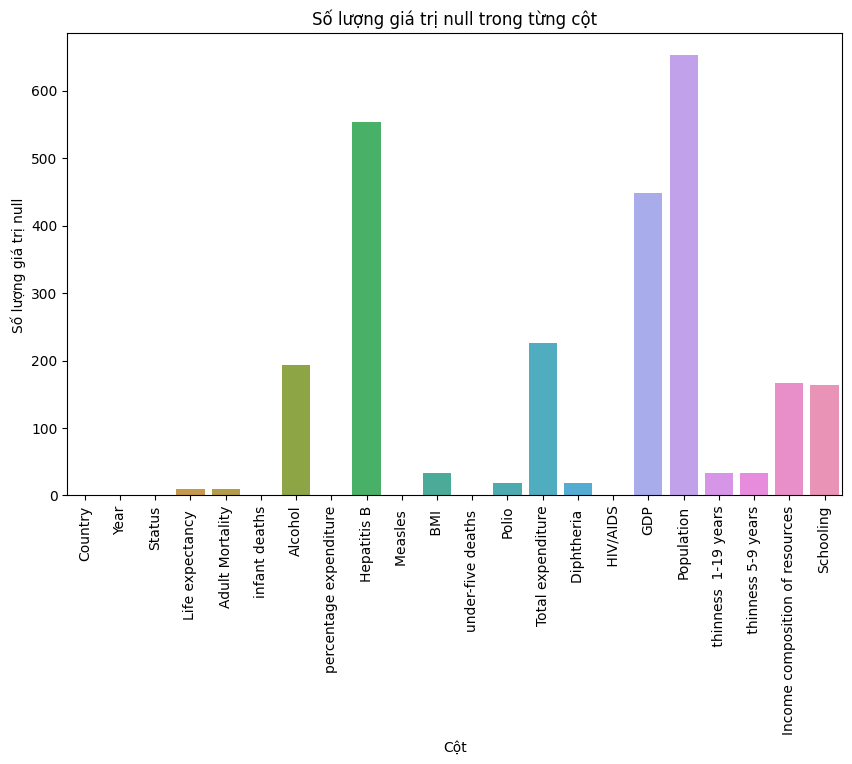

In [ ]:
from pyspark.sql.functions import col, count, when
# # Kiểm tra số lượng giá trị null trong từng cột
# null_counts = data.select([count(when(col(c).isNull(), c)).alias(c) for c in data.columns])

# # In ra số lượng giá trị null trong từng cột
# print("Số lượng giá trị null trong từng cột:")
# null_counts.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Kiểm tra số lượng giá trị null trong từng cột
null_counts = data.select([count(when(col(c).isNull(), c)).alias(c) for c in data.columns])

# Chuyển đổi DataFrame kết quả thành Pandas DataFrame
null_counts_pd = null_counts.toPandas()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(data=null_counts_pd)
plt.xticks(rotation=90)
plt.xlabel('Cột')
plt.ylabel('Số lượng giá trị null')
plt.title('Số lượng giá trị null trong từng cột')
plt.show()



In [ ]:
from pyspark.sql.functions import avg, desc
import matplotlib.pyplot as plt

In [ ]:
# Tính giá trị trung bình của từng cột
mean_values = data.agg(*(avg(c).alias(c) for c in data.columns)).collect()[0]

# Điền các giá trị trống trong DataFrame
for column in data.columns:
    mean_value = mean_values[column]

    # Kiểm tra kiểu dữ liệu và chuyển đổi nếu cần
    if isinstance(mean_value, float):
        data = data.fillna(mean_value, subset=[column])
    else:
        data = data.fillna(0, subset=[column])

23/07/13 15:41:47 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [ ]:
# Kiểm tra các biến xem chúng đã khác null hay chưa
null_columns = []
for column in data.columns:
    null_count = data.filter(data[column].isNull()).count()
    if null_count > 0:
        null_columns.append(column)

# In ra các biến chưa khác null
print("Các biến chưa khác null:")
for column in null_columns:
    print(column)


Các biến chưa khác null:


In [ ]:
print(data)
columns = ['Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

DataFrame[Country: string, Year: int, Status: string, Life expectancy : double, Adult Mortality: int, infant deaths: int, Alcohol: double, percentage expenditure: double, Hepatitis B: int, Measles : int,  BMI : double, under-five deaths : int, Polio: int, Total expenditure: double, Diphtheria : int,  HIV/AIDS: double, GDP: double, Population: double,  thinness  1-19 years: double,  thinness 5-9 years: double, Income composition of resources: double, Schooling: double]


In [ ]:
correlation = data.groupBy("Country").agg(corr("Life expectancy ", "GDP").alias("correlation"))


In [ ]:
correlation.show()


+--------------------+-------------------+
|             Country|        correlation|
+--------------------+-------------------+
|       Côte d'Ivoire|               null|
|                Chad|0.22155586631633187|
|Micronesia (Feder...|               null|
|            Paraguay| 0.2485587383340065|
|               Yemen|               null|
|             Senegal|-0.5571627771245109|
|          Cabo Verde|0.06978925343898841|
|              Sweden|0.21296693457433807|
|            Kiribati| 0.7119727622285337|
|   Republic of Korea|               null|
|              Guyana| 0.5631116702208387|
|             Eritrea| 0.4502185590201882|
|         Philippines| 0.7512848679054012|
|            Djibouti| 0.3861200992925015|
|               Tonga| 0.2727474180372622|
|            Malaysia| 0.3044290738572862|
|           Singapore| 0.4815277659071766|
|                Fiji| 0.5058655391288498|
|              Turkey| 0.3042692858863351|
|              Malawi| 0.6671075733945424|
+----------

In [ ]:
from pyspark.sql.functions import col, asc,desc
correlation = correlation.na.drop(subset=["Country", "correlation"])
top_10_highest = correlation.orderBy(desc("correlation")).limit(10)
top_10_lowest = correlation.orderBy(col("correlation").asc()).limit(10)
top_10_highest.show()
top_10_lowest.show()

+-----------+------------------+
|    Country|       correlation|
+-----------+------------------+
|   Bulgaria|0.8863346203004401|
|   Mongolia|0.8687305247280372|
| Montenegro|0.8656241932929126|
|      Kenya|0.8357553204630027|
|     Uganda| 0.815205943237641|
|   Thailand|0.8126937926457026|
|  Argentina|0.7762536614885601|
|      India|0.7630340756746283|
|    Georgia|0.7607739830559779|
|Philippines|0.7512848679054012|
+-----------+------------------+



+--------------------+--------------------+
|             Country|         correlation|
+--------------------+--------------------+
|         South Sudan| -0.6600579200467915|
|Syrian Arab Republic| -0.5603180276713707|
|             Senegal| -0.5571627771245109|
|             Germany|-0.49844061921982136|
|               Japan| -0.4910149373550062|
|             Grenada|-0.39741039545931617|
|         Netherlands|-0.34665600112632194|
|              Cyprus|-0.33375383294273364|
|             Somalia|-0.27792924138157654|
|Sao Tome and Prin...|-0.22736383518950085|
+--------------------+--------------------+



In [ ]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


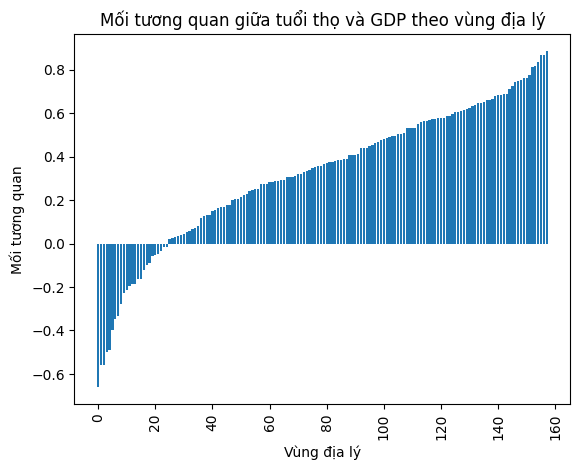

In [ ]:
import matplotlib.pyplot as plt


# Sắp xếp dữ liệu theo mức độ tương quan giảm dần
correlation_sorted = correlation.orderBy("correlation", ascending=False)

# Lấy dữ liệu mối tương quan từ DataFrame
correlation_data = correlation.toPandas()

correlation_data.sort_values(by="correlation", ascending=True, inplace=True)

# Trực quan hóa dữ liệu thành biểu đồ cột
plt.bar(range(len(correlation_data)), correlation_data["correlation"])
plt.xlabel("Vùng địa lý")
plt.ylabel("Mối tương quan")
plt.title("Mối tương quan giữa tuổi thọ và GDP theo vùng địa lý")
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Lấy phần tử lớn nhất
largest_element = correlation_sorted.first()

# Lấy phần tử nhỏ nhất
smallest_element = correlation_sorted.tail(1)[0]

# Lấy phần tử gần 0 nhất
closest_to_zero_element = None
closest_distance = float('inf')  # Gán giá trị vô cùng lớn ban đầu

# Duyệt qua tất cả các phần tử và cập nhật giá trị gần 0 nhất
for row in correlation_sorted.collect():
    distance = abs(row["correlation"])
    if distance < closest_distance:
        closest_to_zero_element = row
        closest_distance = distance

print(largest_element)
print(smallest_element)
print(closest_to_zero_element)

Row(Country='Bulgaria', correlation=0.8863346203004401)
Row(Country='South Sudan', correlation=-0.6600579200467915)
Row(Country='Spain', correlation=-0.015215162811979507)


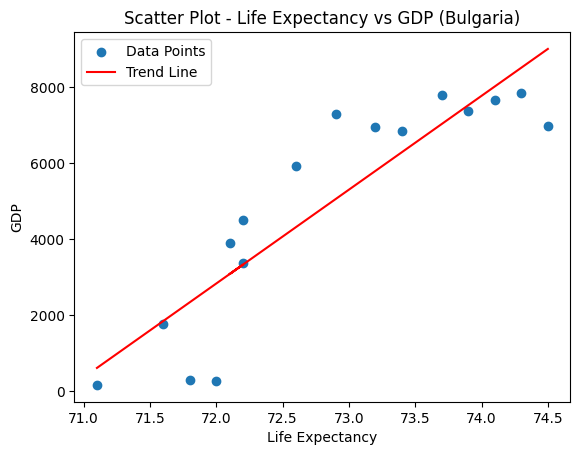

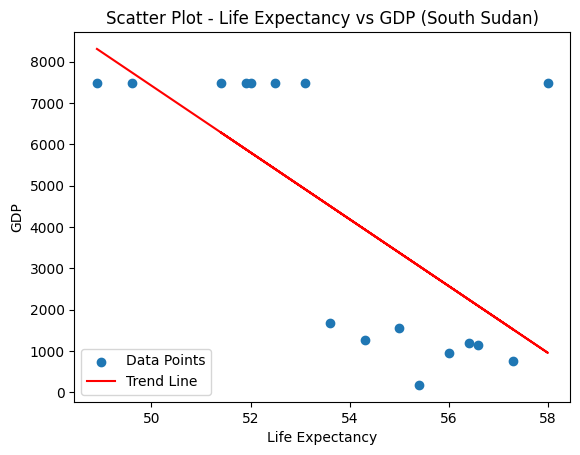

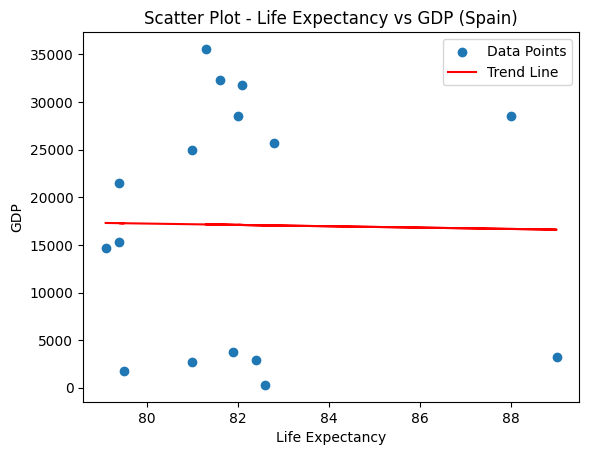

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
import numpy as np

# Các quốc gia cần lấy dữ liệu
countries = ['Bulgaria', 'South Sudan', 'Spain']

# Lấy dữ liệu "Life expectancy" và "GDP" cho các quốc gia đã chỉ định
selected_data = data.filter(col('Country').isin(countries)).select('Country', 'Life expectancy ', 'GDP')

# Chuyển đổi DataFrame Pyspark thành Pandas DataFrame để vẽ biểu đồ
selected_data_pd = selected_data.toPandas()

# Vẽ biểu đồ tương quan scatter cho từng quốc gia và vẽ đường xu hướng
for country in countries:
    country_data = selected_data_pd[selected_data_pd['Country'] == country]
    life_expectancy = country_data['Life expectancy ']
    gdp = country_data['GDP']

    # Tìm phương trình đường xu hướng bằng hàm polyfit của NumPy
    polyfit_coefficients = np.polyfit(life_expectancy, gdp, 1)
    polyfit_line = np.poly1d(polyfit_coefficients)
    trend_line = polyfit_line(life_expectancy)

    # Vẽ biểu đồ scatter và đường xu hướng
    plt.figure()
    plt.scatter(life_expectancy, gdp, label='Data Points')
    plt.plot(life_expectancy, trend_line, color='red', label='Trend Line')

    plt.xlabel('Life Expectancy')
    plt.ylabel('GDP')
    plt.title(f'Scatter Plot - Life Expectancy vs GDP ({country})')
    plt.legend()

# Hiển thị các biểu đồ
plt.show()


In [ ]:
# Lấy số quốc gia có tương quan dương
positive_correlation_count = correlation_sorted.filter(correlation_sorted["correlation"] > 0).count()

# In ra số quốc gia có tương quan dương
print("Số quốc gia có tương quan dương:", positive_correlation_count)

# Tính trung bình tương quan
average_correlation = correlation_sorted.agg({"correlation": "mean"}).collect()[0][0]

# In ra trung bình tương quan
print("Trung bình tương quan:", average_correlation)

# Tính trung bình tuổi thọ
average_life_expectancy = data.agg({"Life expectancy ": "mean"}).collect()[0][0]

# In ra trung bình tuổi thọ
print("Trung bình tuổi thọ:", average_life_expectancy)

# Đếm tổng số quốc gia
total_countries = correlation_sorted.count()

# In ra tổng số quốc gia
print("Tổng số quốc gia:", total_countries)

Số quốc gia có tương quan dương: 133


Trung bình tương quan: 0.321959922908687
Trung bình tuổi thọ: 69.22493169398912
Tổng số quốc gia: 158


In [ ]:
avg_life_expectancy = data.groupBy("Country").agg(avg("Life expectancy ").alias("Average Life Expectancy"), avg("GDP").alias("Average GDP"))


In [ ]:
sorted_data = avg_life_expectancy.orderBy(desc("Average Life Expectancy"))
sorted_data = sorted_data.na.drop(subset=["Country", "Average Life Expectancy", "Average GDP"])

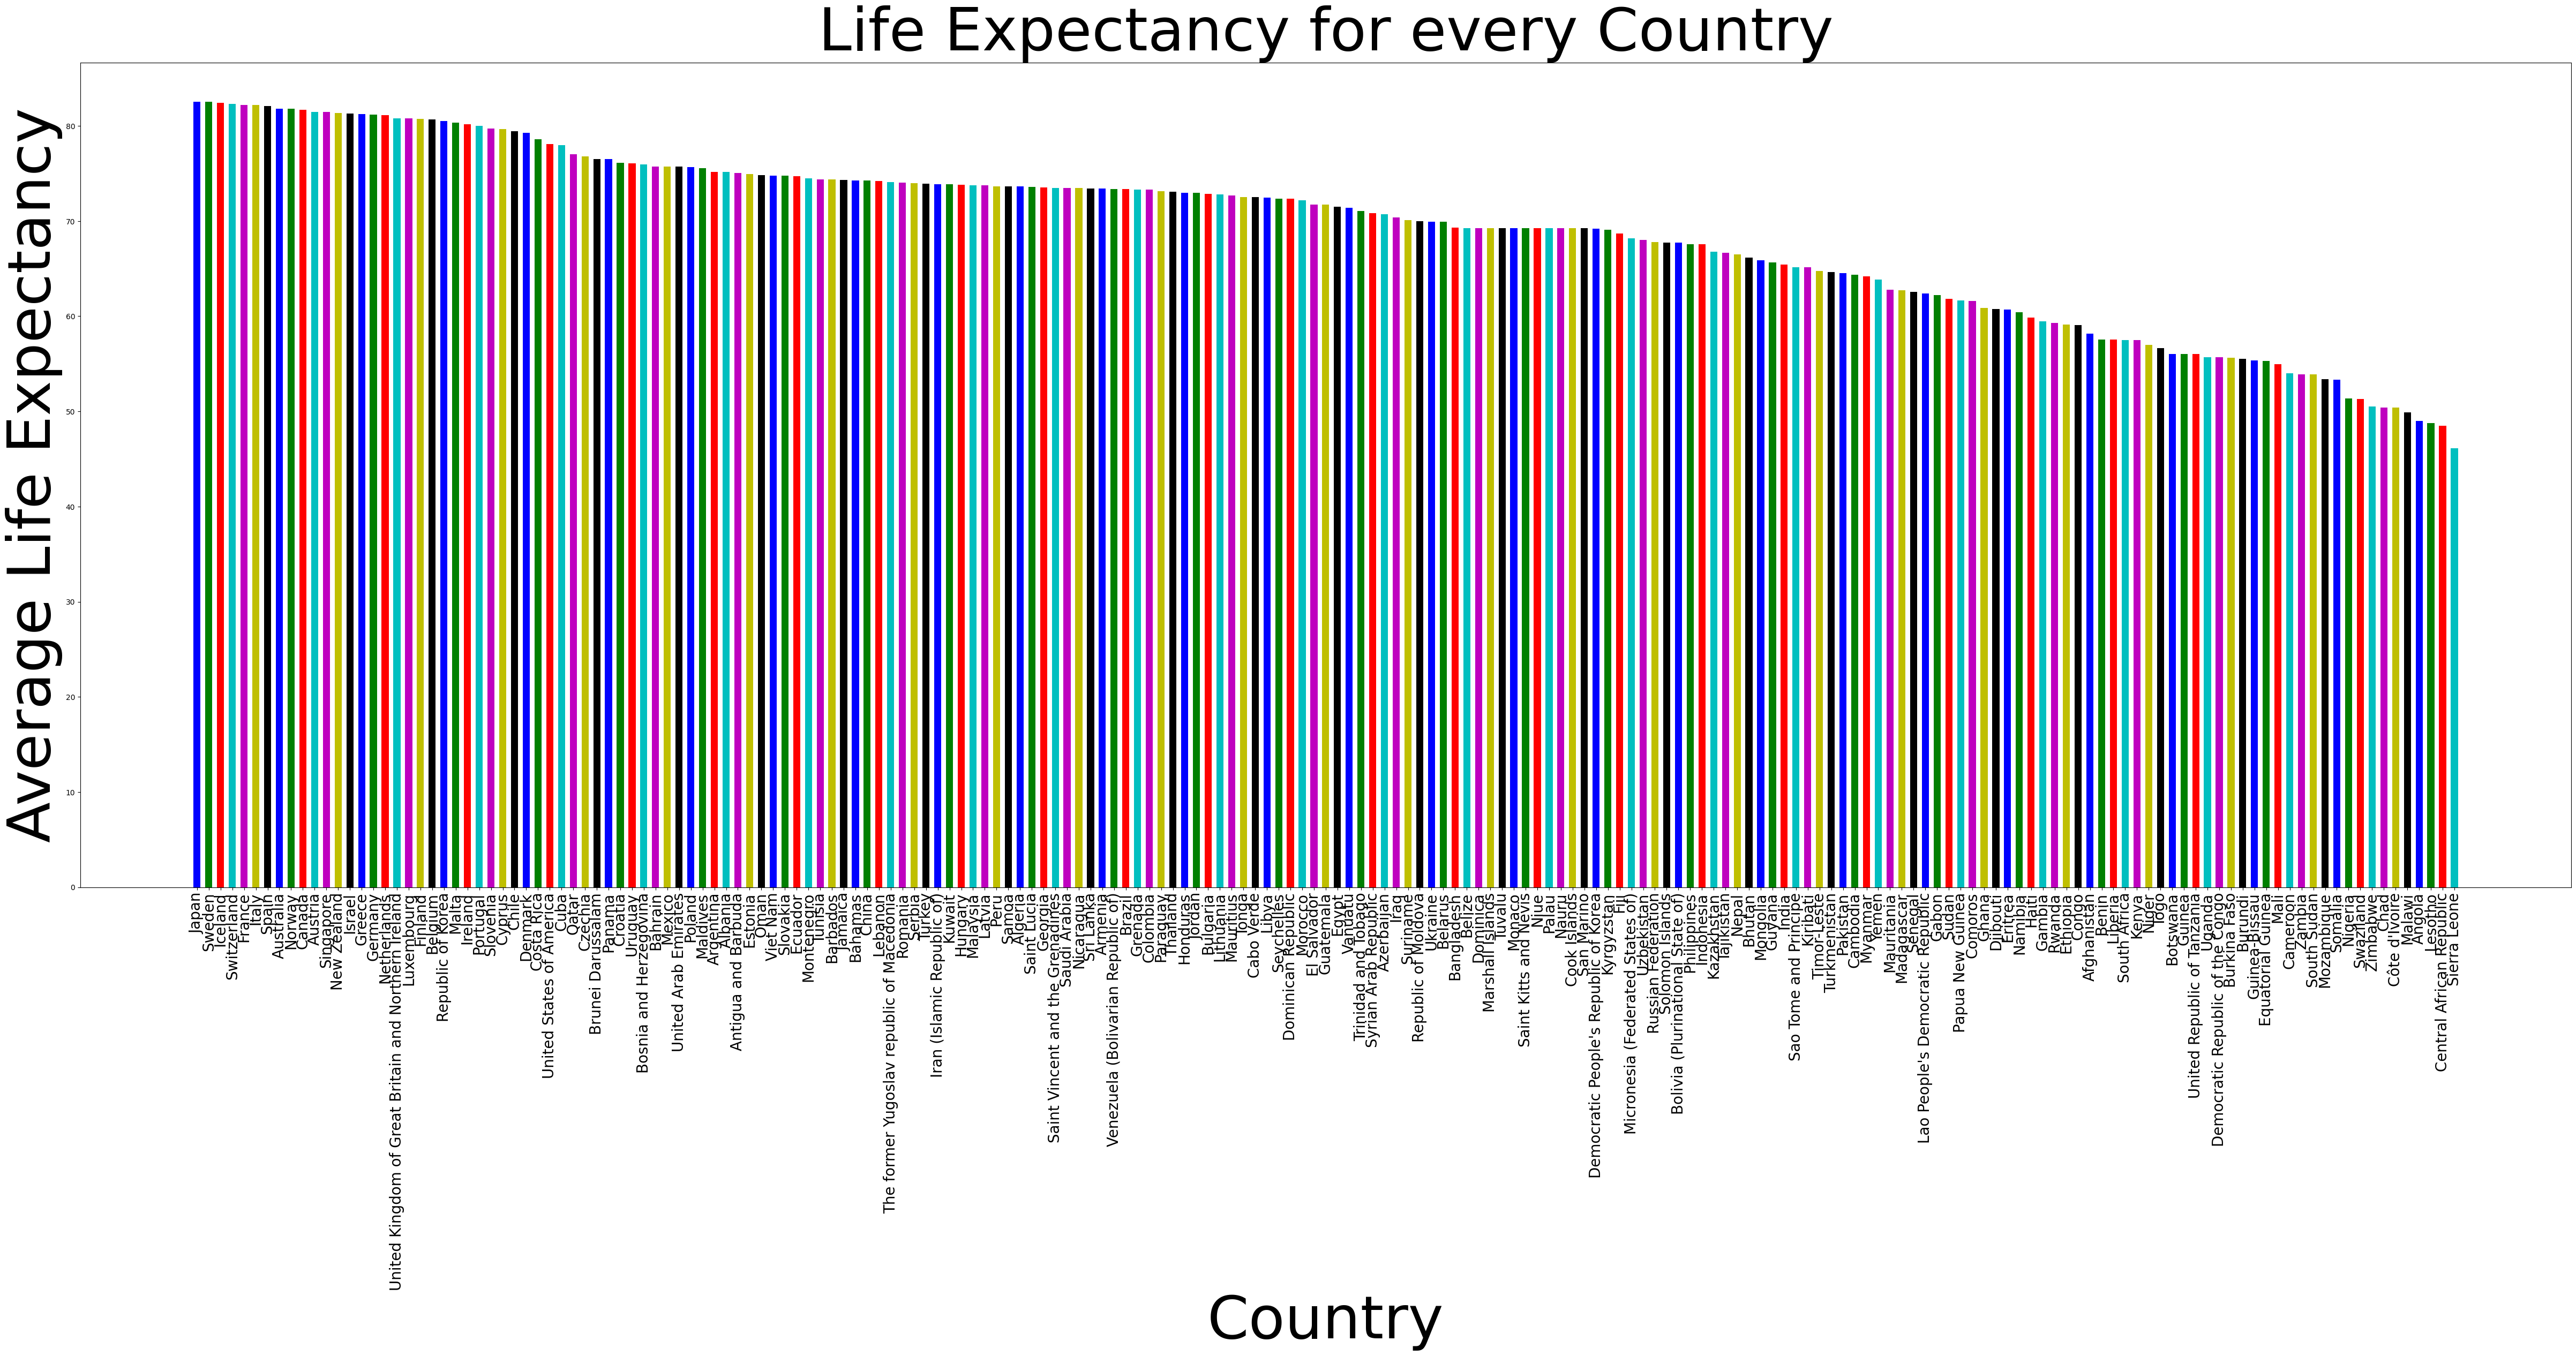

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
font_size=80;
# LifeExpCountry = data.groupBy('Country').agg(avg('Life expectancy ').alias('Avg Life Expectancy')).orderBy('Avg Life Expectancy')
plt.figure(figsize=(60, 20))
plt.plot(kind='bar', figsize=(180,60), fontsize=font_size, color = colors )
plt.bar(avg_life_expectancy_pd["Country"], avg_life_expectancy_pd["Average Life Expectancy"], color=colors, width=0.6, align='center')
plt.title("Life Expectancy for every Country",fontsize=font_size)
plt.xlabel("Country",fontsize=font_size)
plt.xticks(rotation=90, fontsize=20)
plt.ylabel("Average Life Expectancy",fontsize=font_size)
plt.show()


In [ ]:
top_5_highest = sorted_data.limit(5)
top_5_lowest = sorted_data.orderBy("Average Life Expectancy").limit(5)

top_5_highest.show(5, truncate=False)
top_5_lowest.show(5, truncate=False)



+-----------+-----------------------+------------------+
|Country    |Average Life Expectancy|Average GDP       |
+-----------+-----------------------+------------------+
|Japan      |82.5375                |24892.544784375   |
|Sweden     |82.51875               |29334.990639375   |
|Iceland    |82.44375000000001      |30159.5029075     |
|Switzerland|82.33125               |57362.874601250005|
|France     |82.21875               |26465.551380625   |
+-----------+-----------------------+------------------+

+------------------------+-----------------------+------------------+
|Country                 |Average Life Expectancy|Average GDP       |
+------------------------+-----------------------+------------------+
|Sierra Leone            |46.1125                |271.50556128125004|
|Central African Republic|48.51250000000001      |363.05590484999993|
|Lesotho                 |48.78124999999999      |794.5230103125001 |
|Angola                  |49.01875               |1975.14304511874

In [ ]:
# Lấy danh sách các quốc gia trong top 5 thấp nhất
top_5_lowest_countries = top_5_lowest.select("Country").rdd.flatMap(lambda x: x).collect()

# Lọc dữ liệu theo điều kiện
life_expect = data.select("Life expectancy ", " BMI ", "Schooling", "Hepatitis B", "Alcohol", "GDP").filter(~col("Country").isin(top_5_lowest_countries))
life_expect.show()

+----------------+-----+---------+-----------+-------+-----------+
|Life expectancy | BMI |Schooling|Hepatitis B|Alcohol|        GDP|
+----------------+-----+---------+-----------+-------+-----------+
|            65.0| 19.1|     10.1|         65|   0.01|  584.25921|
|            59.9| 18.6|     10.0|         62|   0.01| 612.696514|
|            59.9| 18.1|      9.9|         64|   0.01| 631.744976|
|            59.5| 17.6|      9.8|         67|   0.01|    669.959|
|            59.2| 17.2|      9.5|         68|   0.01|  63.537231|
|            58.8| 16.7|      9.2|         66|   0.01|  553.32894|
|            58.6| 16.2|      8.9|         63|   0.01|445.8932979|
|            58.1| 15.7|      8.7|         64|   0.03|373.3611163|
|            57.5| 15.2|      8.4|         63|   0.02| 369.835796|
|            57.3| 14.7|      8.1|         64|   0.03|  272.56377|
|            57.3| 14.2|      7.9|         66|   0.02| 25.2941299|
|            57.0| 13.8|      6.8|         67|   0.02|219.1413

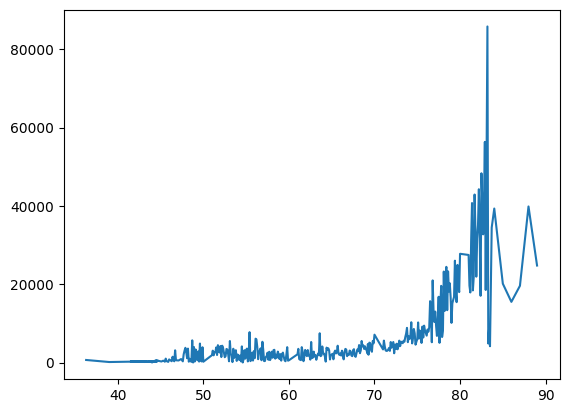

In [ ]:
import matplotlib.pyplot as plt

sorted_data = data.orderBy(col('Life expectancy ').asc())
x_axis = sorted_data.groupBy("Life expectancy ").agg(avg(col("Life expectancy "))).rdd.map(lambda x: x[0]).collect()
y_axis = sorted_data.groupBy("Life expectancy ").agg(avg(col("GDP")).alias("Average GDP")).rdd.map(lambda x: x[1]).collect()

plt.plot(x_axis, y_axis, label="GDP")

plt.show()


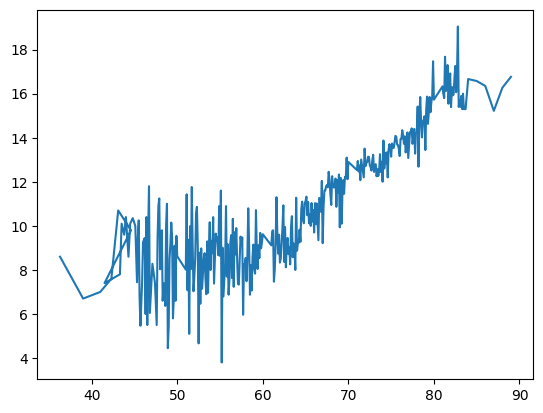

In [ ]:
import matplotlib.pyplot as plt

y_axis = sorted_data.groupBy("Life expectancy ").agg(avg(col("Schooling")).alias("Average Schooling")).rdd.map(lambda x: x[1]).collect()

plt.plot(x_axis, y_axis, label="Schooling")

plt.show()


In [ ]:
print(x_axis)

[36.3, 39.0, 41.0, 42.3, 43.1, 44.6, 41.5, 43.3, 43.5, 43.8, 44.0, 44.3, 44.5, 44.8, 45.1, 45.3, 45.4, 45.5, 45.6, 45.7, 45.9, 46.0, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 47.1, 47.4, 47.6, 47.7, 47.8, 47.9, 48.0, 48.1, 48.2, 48.3, 48.4, 48.5, 48.6, 48.7, 48.8, 48.9, 49.0, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0, 51.0, 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0, 52.1, 52.2, 52.3, 52.4, 52.5, 52.6, 52.7, 52.8, 52.9, 53.0, 53.1, 53.2, 53.3, 53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54.0, 54.1, 54.2, 54.3, 54.4, 54.5, 54.6, 54.7, 54.8, 54.9, 55.0, 55.1, 55.2, 55.3, 55.4, 55.5, 55.6, 55.7, 55.8, 55.9, 56.0, 56.1, 56.2, 56.3, 56.4, 56.5, 56.6, 56.7, 56.8, 56.9, 57.0, 57.1, 57.2, 57.3, 57.4, 57.5, 57.6, 57.7, 57.8, 57.9, 58.0, 58.1, 58.2, 58.3, 58.4, 58.5, 58.6, 58.7, 58.8, 58.9, 59.0, 59.1, 59.2, 59.3, 59.4, 59.5, 59.6, 59.7, 59.8, 59.9, 60.0, 61.0, 61.1, 61.2, 61.3, 61.4, 61.5, 61.6, 61.7, 61.8, 61.9, 62.0, 62.1, 62.2, 62.3, 62.4, 62.5, 62.6, 62.7, 62.8, 62.

In [ ]:
!pip install tensorflow

In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


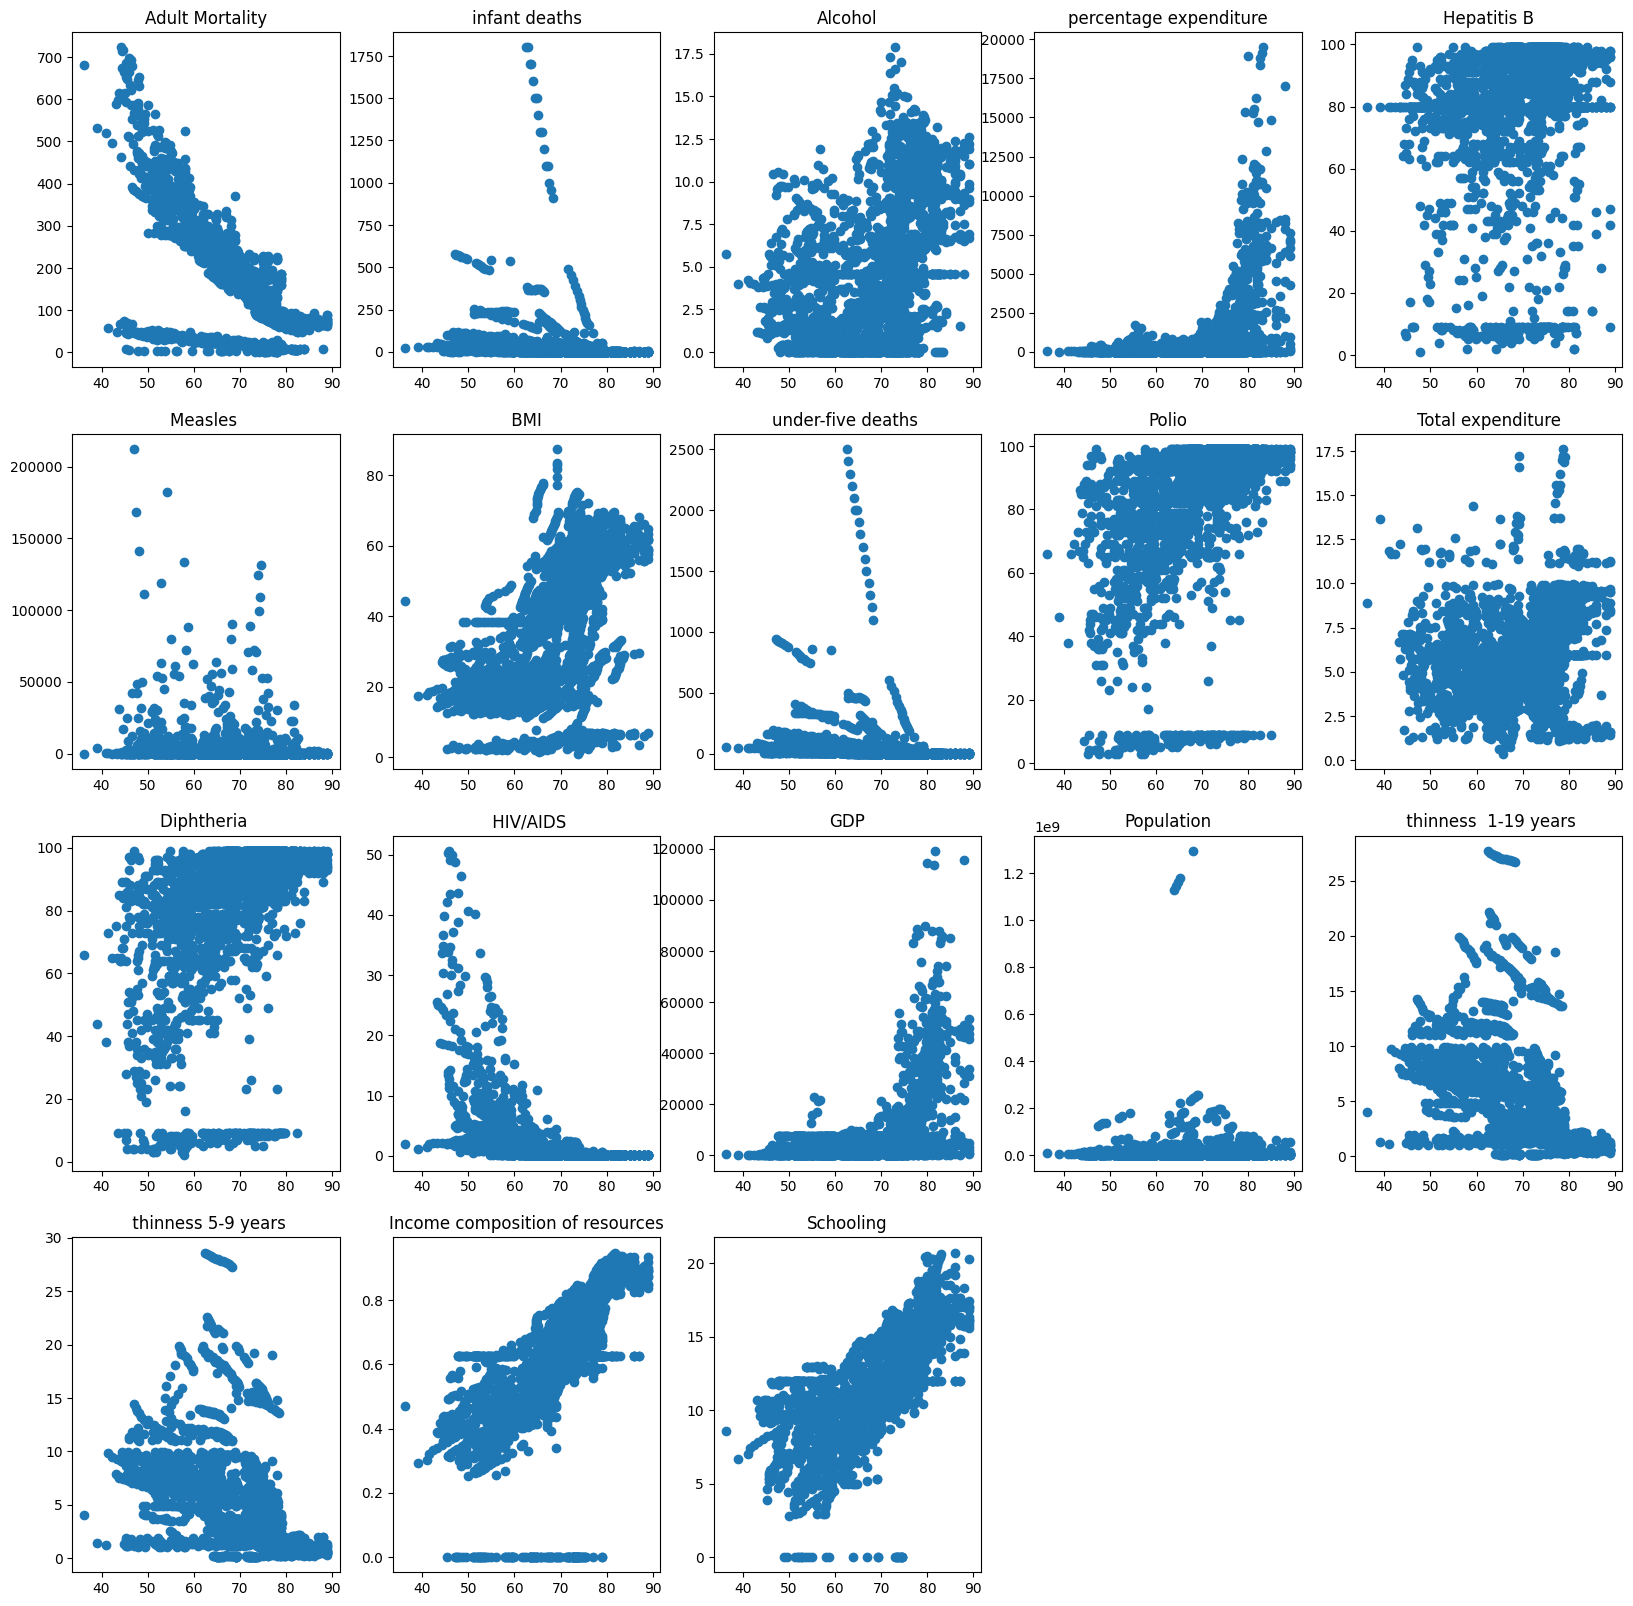

In [ ]:
columns_2 = [column for column in columns if column not in ['Life expectancy ', 'Year']]
plt.figure(figsize = (20, 20))
for i in range(len(columns_2)):
    plt.subplot(4, 5, i + 1)
    plt.scatter(data.select('Life expectancy ').rdd.map(lambda x: x[0]).collect(), data.select(columns_2[i]).rdd.map(lambda x: x[0]).collect())
    plt.title(columns_2[i])

In [ ]:
from pyspark.ml.stat import Correlation
import pandas as pd
columns_3 = [column for column in columns if column not in ['Year']]
df_selected = data.select(columns_3)

# Tạo ma trận tương quan
# corr_matrix = Correlation.corr(df_selected, columns_3).head()
# corr_matrix = df_selected.corr()
# corr_matrix = Correlation.corr(df_selected, columns_3).collect()[0][0]
# corr_matrix_pd = pd.DataFrame(corr_matrix.toArray(), columns=columns_3, index=columns_3)
corr_matrix = pd.DataFrame(columns=columns_3, index=columns_3)

for i in range(len(columns_3)):
    for j in range(i, len(columns_3)):
        col1 = columns_3[i]
        col2 = columns_3[j]
        corr_value = df_selected.stat.corr(col1, col2)
        corr_matrix.at[col1, col2] = corr_value
        corr_matrix.at[col2, col1] = corr_value

<Axes: >

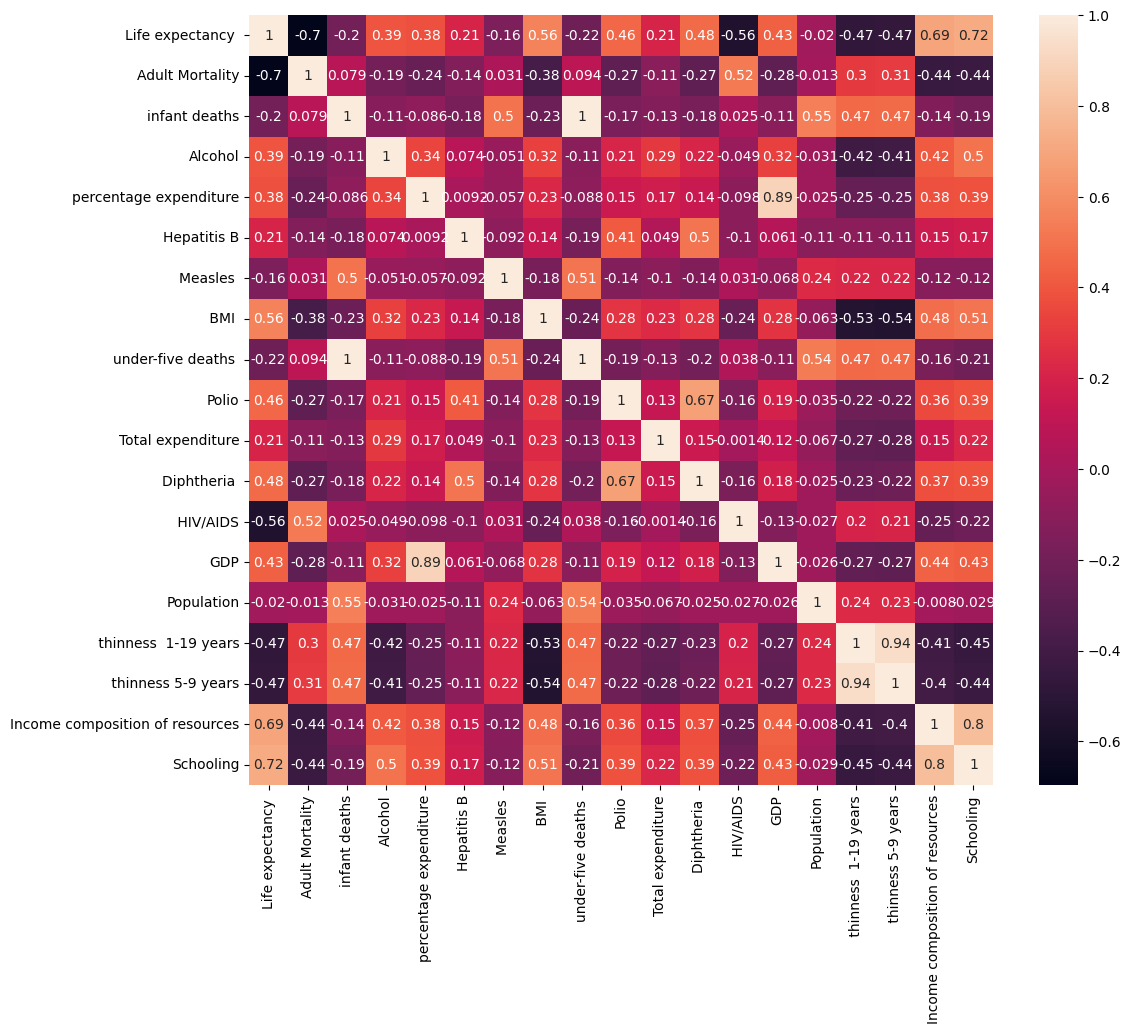

In [ ]:
corr_matrix = corr_matrix.astype(float)
plt.figure(figsize = (12, 10))
sns.heatmap(corr_matrix, annot = True)

In [ ]:
col_x = ["Adult Mortality", " BMI ", "Income composition of resources", "Schooling", "Year"]
col_y = ["Life expectancy "]
le_x = data.select(col_x).rdd.map(lambda x: [x[i] for i in range(0, 5)]).collect()
le_y = data.select(col_y).rdd.map(lambda x: x[0]).collect()



In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import functions as F

# Các trường và nhãn
col_x = ["Adult Mortality", " BMI ", "Income composition of resources", "Schooling", "Year"]
col_y = ["Life expectancy "]

# Lấy dữ liệu cho X và y
X = data.select(col_x)
y = data.select(col_y)

# Tạo VectorAssembler để kết hợp các trường X thành một vector đặc trưng
assembler = VectorAssembler(inputCols=col_x, outputCol="features")
X = assembler.transform(X)

# Kết hợp X và y thành một DataFrame
X = X.withColumn("row_index", F.monotonically_increasing_id())
y = y.withColumn("row_index", F.monotonically_increasing_id())
data_combined = X.join(y, on="row_index").drop("row_index")

# Chia tập train và test theo tỉ lệ 80:20
X_train, X_test = data_combined.randomSplit([0.8, 0.2], seed=42)

# Xây dựng mô hình Random Forest
rf = RandomForestRegressor(labelCol="Life expectancy ", featuresCol="features")
model = rf.fit(X_train)

# Dự đoán trên tập test
predictions = model.transform(X_test)

# Đánh giá mô hình
evaluator = RegressionEvaluator(labelCol="Life expectancy ", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

# Hiển thị độ lỗi bình phương trung bình (RMSE)
print("RMSE:", rmse)

# Dữ liệu mới cần dự đoán
new_data = [
    [260, 25.1, 0.7, 12.3, 2016],
    [170, 28.5, 0.8, 13.8, 2017],
    [210, 23.8, 0.6, 11.5, 2018]
]

# Tạo DataFrame mới từ dữ liệu mới
new_data_df = spark.createDataFrame(new_data, col_x)

# Áp dụng VectorAssembler cho dữ liệu mới
new_data_df = assembler.transform(new_data_df)

# Dự đoán trên dữ liệu mới
new_predictions = model.transform(new_data_df)

# Hiển thị kết quả dự đoán
new_predictions.select("Adult Mortality", " BMI ", "Income composition of resources", "Schooling", "Year", "prediction").show()


RMSE: 3.059347295183131


+---------------+-----+-------------------------------+---------+----+-----------------+
|Adult Mortality| BMI |Income composition of resources|Schooling|Year|       prediction|
+---------------+-----+-------------------------------+---------+----+-----------------+
|            260| 25.1|                            0.7|     12.3|2016|67.26605510347471|
|            170| 28.5|                            0.8|     13.8|2017|73.07078780033763|
|            210| 23.8|                            0.6|     11.5|2018|67.94215923197514|
+---------------+-----+-------------------------------+---------+----+-----------------+



In [ ]:
from pyspark.sql import functions as F

# Tính trung bình của các chỉ số trong tập dữ liệu hiện có
avg_data = data.agg(
    F.avg(F.col("Adult Mortality")).alias("avg_Adult_Mortality"),
    F.avg(F.col(" BMI ")).alias("avg_BMI"),
    F.avg(F.col("Income composition of resources")).alias("avg_Income_composition"),
    F.avg(F.col("Schooling")).alias("avg_Schooling")
)

# Chuyển đổi dữ liệu mới cần dự đoán thành DataFrame
new_data = [
    [avg_data.select("avg_Adult_Mortality").first()[0], avg_data.select("avg_BMI").first()[0],
     avg_data.select("avg_Income_composition").first()[0], avg_data.select("avg_Schooling").first()[0], 2016],
    [avg_data.select("avg_Adult_Mortality").first()[0], avg_data.select("avg_BMI").first()[0],
     avg_data.select("avg_Income_composition").first()[0], avg_data.select("avg_Schooling").first()[0], 2017],
    [avg_data.select("avg_Adult_Mortality").first()[0], avg_data.select("avg_BMI").first()[0],
     avg_data.select("avg_Income_composition").first()[0], avg_data.select("avg_Schooling").first()[0], 2018]
]

new_data_df = spark.createDataFrame(new_data, col_x)

# Áp dụng VectorAssembler cho dữ liệu mới
new_data_df = assembler.transform(new_data_df)

# Dự đoán trên dữ liệu mới
new_predictions = model.transform(new_data_df)

# Hiển thị kết quả dự đoán
new_predictions.select("Adult Mortality", " BMI ", "Income composition of resources", "Schooling", "Year", "prediction").show()


+------------------+-----------------+-------------------------------+------------------+----+-----------------+
|   Adult Mortality|             BMI |Income composition of resources|         Schooling|Year|       prediction|
+------------------+-----------------+-------------------------------+------------------+----+-----------------+
|164.79373723621512|38.32124655647371|             0.6275510645976156|11.992792792792802|2016|69.61356425680897|
|164.79373723621512|38.32124655647371|             0.6275510645976156|11.992792792792802|2017|69.61356425680897|
|164.79373723621512|38.32124655647371|             0.6275510645976156|11.992792792792802|2018|69.61356425680897|
+------------------+-----------------+-------------------------------+------------------+----+-----------------+



In [ ]:
# Dữ liệu mới cần dự đoán
new_data = [
    [170, 28.5, 0.8, 13.8, 2016],
    [170, 28.5, 0.8, 13.8, 2017],
    [170, 28.5, 0.8, 13.8, 2018]
]

# Tạo DataFrame mới từ dữ liệu mới
new_data_df = spark.createDataFrame(new_data, col_x)

# Áp dụng VectorAssembler cho dữ liệu mới
new_data_df = assembler.transform(new_data_df)

# Dự đoán trên dữ liệu mới
new_predictions = model.transform(new_data_df)

# Hiển thị kết quả dự đoán
new_predictions.select("Adult Mortality", " BMI ", "Income composition of resources", "Schooling", "Year", "prediction").show()

+---------------+-----+-------------------------------+---------+----+-----------------+
|Adult Mortality| BMI |Income composition of resources|Schooling|Year|       prediction|
+---------------+-----+-------------------------------+---------+----+-----------------+
|            170| 28.5|                            0.8|     13.8|2016|72.45758096411744|
|            170| 28.5|                            0.8|     13.8|2017|72.45758096411744|
|            170| 28.5|                            0.8|     13.8|2018|72.45758096411744|
+---------------+-----+-------------------------------+---------+----+-----------------+



In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import functions as F

# Các trường và nhãn
col_x = ["Adult Mortality", " BMI ", "Income composition of resources", "Schooling", "Year"]
col_y = ["Life expectancy "]

# Lấy dữ liệu cho X và y
X = data.select(col_x)
y = data.select(col_y)

# Tạo VectorAssembler để kết hợp các trường X thành một vector đặc trưng
assembler = VectorAssembler(inputCols=col_x, outputCol="features")
X = assembler.transform(X)

# Kết hợp X và y thành một DataFrame
X = X.withColumn("row_index", F.monotonically_increasing_id())
y = y.withColumn("row_index", F.monotonically_increasing_id())
data_combined = X.join(y, on="row_index").drop("row_index")

# Chia tập train và test theo tỉ lệ 80:20
X_train, X_test = data_combined.randomSplit([0.8, 0.2], seed=42)

# Xây dựng mô hình Gradient Boosted Trees Regression
gbt = GBTRegressor(labelCol="Life expectancy ", featuresCol="features")
model = gbt.fit(X_train)

# Dự đoán trên tập test
predictions = model.transform(X_test)

# Đánh giá mô hình
evaluator = RegressionEvaluator(labelCol="Life expectancy ", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

# Hiển thị độ lỗi bình phương trung bình (RMSE)
print("RMSE:", rmse)

# Dữ liệu mới cần dự đoán
new_data = [
    [260, 25.1, 0.7, 12.3, 2016],
    [170, 28.5, 0.8, 13.8, 2017],
    [210, 23.8, 0.6, 11.5, 2018]
]

# Tạo DataFrame mới từ dữ liệu mới
new_data_df = spark.createDataFrame(new_data, col_x)

# Áp dụng VectorAssembler cho dữ liệu mới
new_data_df = assembler.transform(new_data_df)

# Dự đoán trên dữ liệu mới
new_predictions = model.transform(new_data_df)

# Hiển thị kết quả dự đoán
new_predictions.select("Adult Mortality", " BMI ", "Income composition of resources", "Schooling", "Year", "prediction").show()


RMSE: 2.5461731497163553


+---------------+-----+-------------------------------+---------+----+-----------------+
|Adult Mortality| BMI |Income composition of resources|Schooling|Year|       prediction|
+---------------+-----+-------------------------------+---------+----+-----------------+
|            260| 25.1|                            0.7|     12.3|2016|67.99623809014251|
|            170| 28.5|                            0.8|     13.8|2017|72.59076369755485|
|            210| 23.8|                            0.6|     11.5|2018|68.57432031749589|
+---------------+-----+-------------------------------+---------+----+-----------------+



In [ ]:
from pyspark.sql import functions as F

# Tính trung bình của các chỉ số trong tập dữ liệu hiện có naăm 2015
avg_data_2015 = data.filter(F.col("Year") == 2015).agg(
    F.avg(F.col("Adult Mortality")).alias("avg_Adult_Mortality"),
    F.avg(F.col(" BMI ")).alias("avg_BMI"),
    F.avg(F.col("Income composition of resources")).alias("avg_Income_composition"),
    F.avg(F.col("Schooling")).alias("avg_Schooling")
)

# Chuyển đổi dữ liệu mới cần dự đoán thành DataFrame
new_data = [
    [avg_data_2015.select("avg_Adult_Mortality").first()[0], avg_data_2015.select("avg_BMI").first()[0],
     avg_data_2015.select("avg_Income_composition").first()[0], avg_data_2015.select("avg_Schooling").first()[0], 2016]
]

new_data_df = spark.createDataFrame(new_data, col_x)

# Áp dụng VectorAssembler cho dữ liệu mới
new_data_df = assembler.transform(new_data_df)

# Dự đoán trên dữ liệu mới
new_predictions = model.transform(new_data_df)

# Hiển thị kết quả dự đoán
new_predictions.select("Adult Mortality", " BMI ", "Income composition of resources", "Schooling", "Year", "prediction").show()


+------------------+-----------------+-------------------------------+------------------+----+-----------------+
|   Adult Mortality|             BMI |Income composition of resources|         Schooling|Year|       prediction|
+------------------+-----------------+-------------------------------+------------------+----+-----------------+
|152.86338797814207|42.70569668367733|             0.6882322986118916|12.876108895781035|2016|72.68131784604888|
+------------------+-----------------+-------------------------------+------------------+----+-----------------+



/tmp/ipykernel_16/2758431902.py:25: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x_values, y_values, 'k--', label='Joined', linestyle='--')


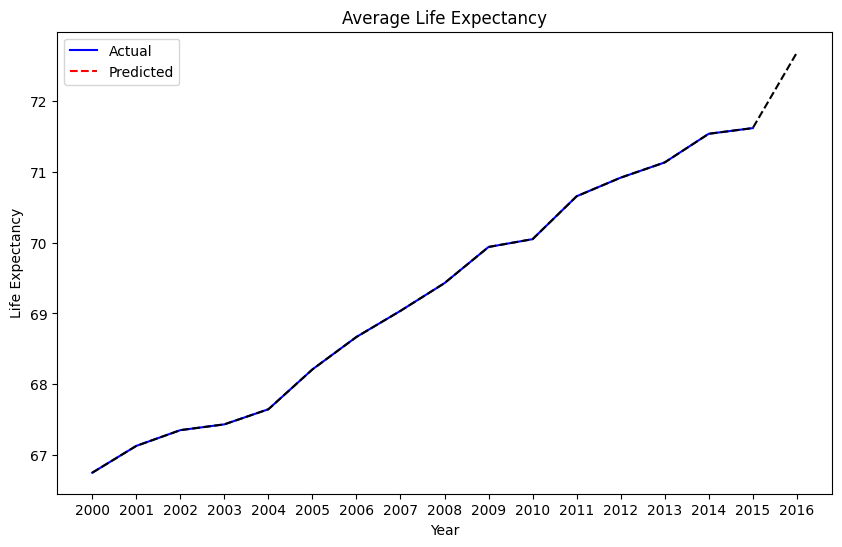

In [ ]:
import matplotlib.pyplot as plt

# Tuổi thọ trung bình thực tế
actual_life_expectancy = data.groupBy("Year").agg(F.avg("Life expectancy ").alias("avg_life_expectancy")).orderBy("Year").toPandas()

# Tuổi thọ trung bình dự đoán
predicted_life_expectancy = new_predictions.select("Year", "prediction").toPandas()

# Chuyển đổi kiểu dữ liệu của cột Year sang số nguyên
actual_life_expectancy["Year"] = actual_life_expectancy["Year"].astype(int)
predicted_life_expectancy["Year"] = predicted_life_expectancy["Year"].astype(int)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(actual_life_expectancy["Year"], actual_life_expectancy["avg_life_expectancy"], 'b-', label='Actual')
plt.plot(predicted_life_expectancy["Year"], predicted_life_expectancy["prediction"], 'r--', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Average Life Expectancy')
plt.legend()

# Nối đường nét đứt và nét liền
x_values = list(actual_life_expectancy["Year"]) + list(predicted_life_expectancy["Year"])
y_values = list(actual_life_expectancy["avg_life_expectancy"]) + list(predicted_life_expectancy["prediction"])
plt.plot(x_values, y_values, 'k--', label='Joined', linestyle='--')

# Chỉ định bước nhảy của các năm trên trục x
plt.xticks(range(min(actual_life_expectancy["Year"]), max(predicted_life_expectancy["Year"]) + 1, 1))

plt.show()


In [ ]:
predictions.show()

+---------------+-----+-------------------------------+---------+----+--------------------+----------------+-----------------+
|Adult Mortality| BMI |Income composition of resources|Schooling|Year|            features|Life expectancy |       prediction|
+---------------+-----+-------------------------------+---------+----+--------------------+----------------+-----------------+
|              1| 46.4|                          0.708|     11.7|2001|[1.0,46.4,0.708,1...|            77.5|73.50199656577989|
|              1| 53.7|                          0.793|     15.3|2014|[1.0,53.7,0.793,1...|            75.4|76.34735111033224|
|              1| 56.1|                          0.856|     17.7|2001|[1.0,56.1,0.856,1...|            78.0|77.56190800218886|
|              2| 18.9|                          0.487|      6.1|2005|[2.0,18.9,0.487,6...|            62.9|58.53907029071593|
|              2| 77.1|                          0.597|     11.9|2014|[2.0,77.1,0.597,1...|            66.1|74.

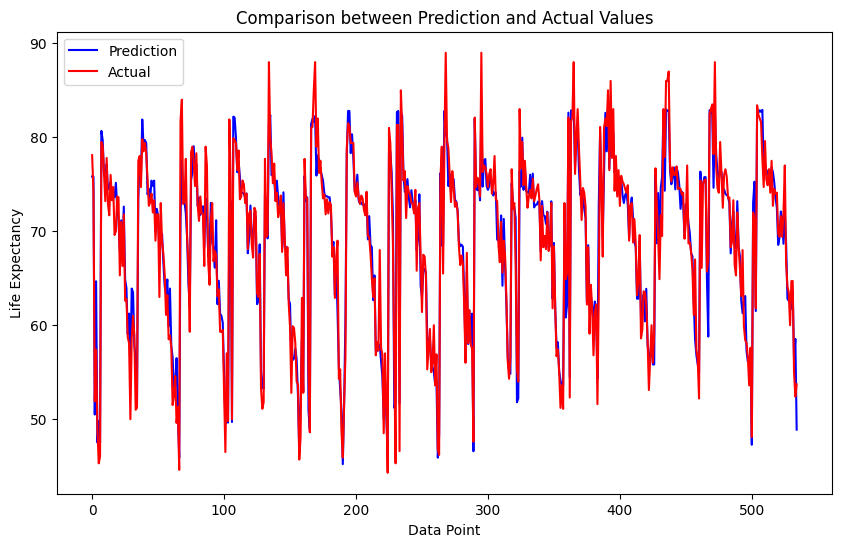

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, asc,desc
# Lấy giá trị dự đoán và giá trị thực tế từ DataFrame
predicted_values = predictions.select("prediction").orderBy(col('Year').asc()).rdd.flatMap(lambda x: x).collect()
actual_values = predictions.select("Life expectancy ").orderBy(col('Year').asc()).rdd.flatMap(lambda x: x).collect()

# Tạo list chỉ số cho các điểm dữ liệu
indices = range(len(predicted_values))

# Vẽ biểu đồ so sánh giữa dự đoán và giá trị thực tế
plt.figure(figsize=(10, 6))
plt.plot(indices, predicted_values, 'b-', label='Prediction')
plt.plot(indices, actual_values, 'r-', label='Actual')
plt.xlabel('Data Point')
plt.ylabel('Life Expectancy')
plt.title('Comparison between Prediction and Actual Values')
plt.legend()
plt.show()


In [ ]:
# Đánh giá mô hình
evaluator = RegressionEvaluator(labelCol="Life expectancy ", predictionCol="prediction")
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

# Hiển thị kết quả
print("RMSE:", rmse)
print("R-squared:", r2)

RMSE: 2.5461731497163553
R-squared: 0.928112718840529


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import functions as F

# Các trường và nhãn
col_x = ["percentage expenditure", "Income composition of resources", "Life expectancy ", "Schooling", "Year"]
col_y = ["GDP"]

# Lấy dữ liệu cho X và y
X = data.select(col_x)
y = data.select(col_y)

# Tạo VectorAssembler để kết hợp các trường X thành một vector đặc trưng
assembler = VectorAssembler(inputCols=col_x, outputCol="features")
X = assembler.transform(X)

# Kết hợp X và y thành một DataFrame
X = X.withColumn("row_index", F.monotonically_increasing_id())
y = y.withColumn("row_index", F.monotonically_increasing_id())
data_combined = X.join(y, on="row_index").drop("row_index")

# Chia tập train và test theo tỉ lệ 80:20
X_train, X_test = data_combined.randomSplit([0.8, 0.2], seed=42)

# Xây dựng mô hình Gradient Boosted Trees Regression
gbt = GBTRegressor(labelCol="GDP", featuresCol="features")
model = gbt.fit(X_train)

# Dự đoán trên tập test
predictions = model.transform(X_test)

# Đánh giá mô hình
evaluator = RegressionEvaluator(labelCol="GDP", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

# Hiển thị độ lỗi bình phương trung bình (RMSE)
print("RMSE:", rmse)

# Dữ liệu mới cần dự đoán
new_data = [
    [260, 25.1, 0.7, 12.3, 2016],
    [170, 28.5, 0.8, 13.8, 2017],
    [210, 23.8, 0.6, 11.5, 2018]
]

# Tạo DataFrame mới từ dữ liệu mới
new_data_df = spark.createDataFrame(new_data, col_x)

# Áp dụng VectorAssembler cho dữ liệu mới
new_data_df = assembler.transform(new_data_df)

# Dự đoán trên dữ liệu mới
new_predictions = model.transform(new_data_df)

# Hiển thị kết quả dự đoán
new_predictions.select("percentage expenditure", "Income composition of resources", "Schooling", "Life expectancy ", "Year", "prediction").show()


RMSE: 5591.418786226271
+----------------------+-------------------------------+---------+----------------+----+------------------+
|percentage expenditure|Income composition of resources|Schooling|Life expectancy |Year|        prediction|
+----------------------+-------------------------------+---------+----------------+----+------------------+
|                   260|                           25.1|      0.7|            12.3|2016| 34194.08990853689|
|                   170|                           28.5|      0.8|            13.8|2017|33658.271232232975|
|                   210|                           23.8|      0.6|            11.5|2018| 34194.08990853689|
+----------------------+-------------------------------+---------+----------------+----+------------------+



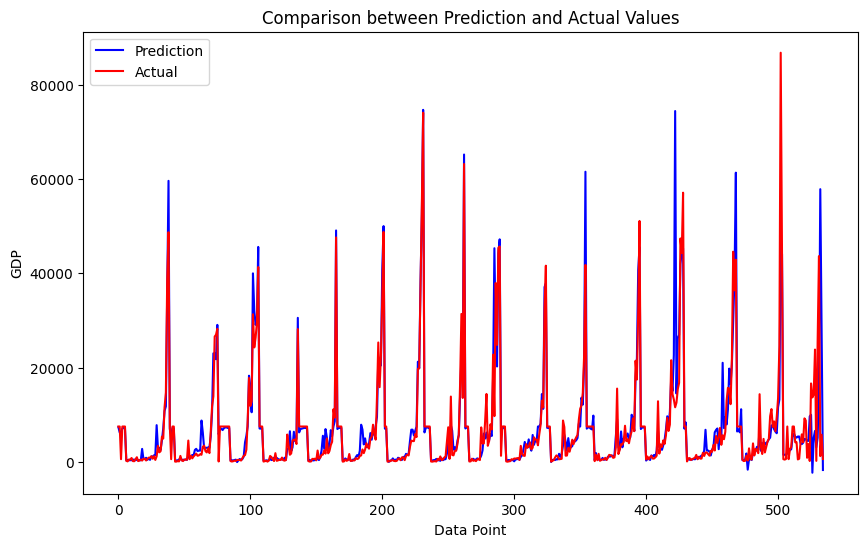

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, asc,desc
# Lấy giá trị dự đoán và giá trị thực tế từ DataFrame
predicted_values = predictions.select("prediction").orderBy(col('Year').asc()).rdd.flatMap(lambda x: x).collect()
actual_values = predictions.select("GDP").orderBy(col('Year').asc()).rdd.flatMap(lambda x: x).collect()

# Tạo list chỉ số cho các điểm dữ liệu
indices = range(len(predicted_values))

# Vẽ biểu đồ so sánh giữa dự đoán và giá trị thực tế
plt.figure(figsize=(10, 6))
plt.plot(indices, predicted_values, 'b-', label='Prediction')
plt.plot(indices, actual_values, 'r-', label='Actual')
plt.xlabel('Data Point')
plt.ylabel('GDP')
plt.title('Comparison between Prediction and Actual Values')
plt.legend()
plt.show()


In [1]:
import matplotlib.pyplot as plt

# Tuổi thọ trung bình thực tế
actual_life_expectancy = data.groupBy("Year").agg(F.avg("GDP").alias("avg_GDP")).orderBy("Year").toPandas()

# Tuổi thọ trung bình dự đoán
# predicted_life_expectancy = new_predictions.select("Year", "prediction").toPandas()

# Chuyển đổi kiểu dữ liệu của cột Year sang số nguyên
actual_life_expectancy["Year"] = actual_life_expectancy["Year"].astype(int)
# predicted_life_expectancy["Year"] = predicted_life_expectancy["Year"].astype(int)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(actual_life_expectancy["Year"], actual_life_expectancy["avg_GDP"], 'b-', label='Actual')
# plt.plot(predicted_life_expectancy["Year"], predicted_life_expectancy["prediction"], 'r--', label='Predicted')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Average GDP')
plt.legend()

# # Nối đường nét đứt và nét liền
# x_values = list(actual_life_expectancy["Year"]) + list(predicted_life_expectancy["Year"])
# y_values = list(actual_life_expectancy["avg_GDP"]) + list(predicted_life_expectancy["prediction"])
# plt.plot(x_values, y_values, 'k--', label='Joined', linestyle='--')

# Chỉ định bước nhảy của các năm trên trục x
plt.xticks(range(min(actual_life_expectancy["Year"]), max(predicted_life_expectancy["Year"]) + 1, 1))

plt.show()


NameError: ignored

In [ ]:
import numpy as np
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
import tensorflow as tf
from tensorflow import keras

# Khởi tạo SparkSession
spark = SparkSession.builder.getOrCreate()

# Các trường và nhãn
col_x = ["Adult Mortality", " BMI ", "Income composition of resources", "Schooling", "Year"]
col_y = ["Life expectancy "]

# Lấy dữ liệu cho X và y
X = data.select(col_x)
y = data.select(col_y)

# Chuyển đổi DataFrame thành Pandas DataFrame để sử dụng trong TensorFlow
X_pd = X.toPandas()
y_pd = y.toPandas()

# Xác định time_steps dựa trên dữ liệu X
time_steps = len(col_x)

# Xây dựng mô hình LSTM với Keras
model = keras.Sequential([
    keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

# Chuyển đổi dữ liệu X và y thành dạng numpy array
X_np = np.expand_dims(X_pd.values, axis=2)
y_np = y_pd.values

# Huấn luyện mô hình
model.fit(X_np, y_np, epochs=10, batch_size=32)

# Chuyển đổi dữ liệu mới cần dự đoán thành DataFrame
new_data = [
    [260, 25.1, 0.7, 12.3, 2016],
    [260, 25.1, 0.7, 12.3, 2017],
    [260, 25.1, 0.7, 12.3, 2018]
]

new_data_df = spark.createDataFrame(new_data, col_x)

# Chuyển đổi dữ liệu mới thành dạng numpy array
new_data_np = np.expand_dims(new_data_df.toPandas().values, axis=2)

# Dự đoán trên dữ liệu mới
predictions_np = model.predict(new_data_np)
predictions_df = spark.createDataFrame(predictions_np.tolist(), ["prediction"])

# Hiển thị kết quả dự đoán
predictions_df.show()


Epoch 1/10
92/92 [==============================] - 3s 9ms/step - loss: 447.7345
Epoch 2/10
92/92 [==============================] - 1s 7ms/step - loss: 62.7215
Epoch 3/10
92/92 [==============================] - 1s 7ms/step - loss: 40.4956
Epoch 4/10
92/92 [==============================] - 1s 7ms/step - loss: 30.9986
Epoch 5/10
92/92 [==============================] - 1s 7ms/step - loss: 24.4196
Epoch 6/10
92/92 [==============================] - 1s 7ms/step - loss: 23.2640
Epoch 7/10
92/92 [==============================] - 1s 7ms/step - loss: 22.2017
Epoch 8/10
92/92 [==============================] - 1s 7ms/step - loss: 19.0873
Epoch 9/10
92/92 [==============================] - 1s 7ms/step - loss: 17.9209
Epoch 10/10
1/1 [==============================] - 0s 198ms/step
+------------------+
|        prediction|
+------------------+
|50.880252838134766|
| 59.20356750488281|
| 53.96343994140625|
+------------------+



In [ ]:
# Chuyển đổi dữ liệu mới cần dự đoán thành DataFrame
new_data = [
    [260, 25.1, 0.7, 12.3, 2016],
    [260, 25.1, 0.7, 12.3, 2017],
    [50, 23.5, 0.99, 20.0, 2025]
]

new_data_df = spark.createDataFrame(new_data, col_x)

# Chuyển đổi dữ liệu mới thành dạng numpy array
new_data_np = np.expand_dims(new_data_df.toPandas().values, axis=2)

# Dự đoán trên dữ liệu mới
predictions_np = model.predict(new_data_np)
predictions_df = spark.createDataFrame(predictions_np.tolist(), ["prediction"])

# Hiển thị kết quả dự đoán
predictions_df.show()

1/1 [==============================] - 0s 25ms/step
+------------------+
|        prediction|
+------------------+
|50.880252838134766|
|50.903358459472656|
|  66.0385971069336|
+------------------+



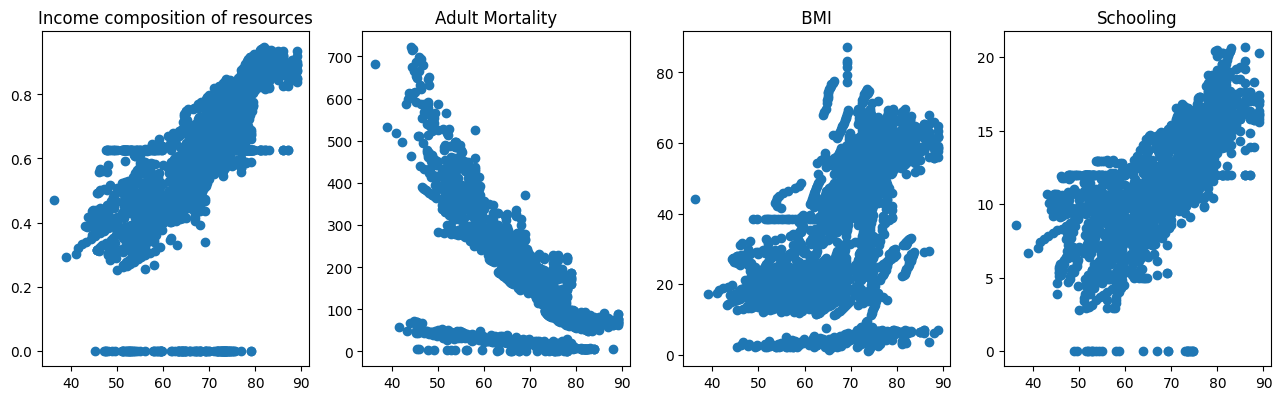

In [ ]:
filtered_columns = ['Income composition of resources', 'Adult Mortality', ' BMI ', 'Schooling']
plt.figure(figsize = (20, 20))
for i in range(len(filtered_columns)):
    plt.subplot(4, 5, i + 1)
    plt.scatter(data.select('Life expectancy ').rdd.map(lambda x: x[0]).collect(), data.select(filtered_columns[i]).rdd.map(lambda x: x[0]).collect())
    plt.title(filtered_columns[i])